In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [8]:
df=pd.read_csv('car.csv')
df.head()
df= df.select_dtypes(include='number').dropna()
df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 25.8 K

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value,p_value

(3519.870731071363, 0.0)

In [12]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8568554109580672

In [14]:
fa=FactorAnalyzer(15,rotation=None)
fa.fit(df)


FactorAnalyzer(n_factors=15, rotation=None, rotation_kwargs={})

In [17]:
ev,v=fa.get_eigenvalues()
ev

array([7.46687384, 2.72643528, 1.3800186 , 1.07907918, 0.76803247,
       0.61682308, 0.53218454, 0.37678676, 0.33891989, 0.26093704,
       0.12848535, 0.10465921, 0.07943007, 0.07203598, 0.05026284,
       0.01903588])

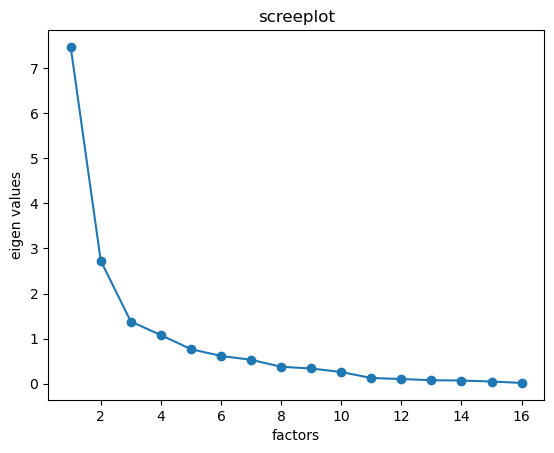

In [19]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('screeplot')
plt.xlabel('factors')
plt.ylabel('eigen values')
plt.show()

In [20]:
fa=FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(df)
loadings=fa.loadings_
loadings

array([[-0.01092791,  0.33049613, -0.01801566],
       [-0.06081904, -0.60916865, -0.110523  ],
       [ 0.61627998,  0.66272566,  0.2348648 ],
       [ 0.78137499,  0.52357417,  0.13563312],
       [ 0.80843872,  0.27336807,  0.26629043],
       [ 0.08675413,  0.79290579,  0.05203793],
       [ 0.91530074,  0.25190592,  0.24563035],
       [ 0.86837094, -0.03939508,  0.32099334],
       [ 0.64190686,  0.21290522,  0.01937556],
       [ 0.11343442, -0.06885858,  0.28686817],
       [-0.11294203,  0.29202518,  0.64746682],
       [ 0.89334034, -0.23886204, -0.04247124],
       [-0.04560531, -0.40222   , -0.4450694 ],
       [-0.91171864,  0.01395344,  0.35421189],
       [-0.908416  , -0.06104366,  0.28992493],
       [ 0.86914188, -0.02667678,  0.23287237]])

In [21]:
fa=FactorAnalyzer(5,rotation='varimax')
fa.fit(df)
loadings=fa.loadings_
loadings

array([[ 0.0068624 ,  0.14930511,  0.19578189, -0.50796956, -0.12746447],
       [-0.03398201, -0.63970003, -0.15114908,  0.06728088, -0.04827152],
       [ 0.58285619,  0.72198706,  0.2303204 ,  0.07702208, -0.13376318],
       [ 0.75503068,  0.52162154,  0.15808184, -0.03321788, -0.19842958],
       [ 0.80028819,  0.31998678,  0.19746063,  0.12290225, -0.10011661],
       [ 0.05351729,  0.77230166,  0.15792273, -0.18345778, -0.02188616],
       [ 0.91302399,  0.27260187,  0.19285187,  0.04418685, -0.10040029],
       [ 0.89491584,  0.02405239,  0.18475902,  0.10629671,  0.12456194],
       [ 0.68537276,  0.08023825,  0.13025495, -0.40962389, -0.08731681],
       [ 0.11303724, -0.02606956,  0.23247589,  0.43301365, -0.16906713],
       [-0.05950141,  0.19207462,  0.68805085,  0.07841641,  0.02861771],
       [ 0.90104114, -0.15826954, -0.17565077,  0.00395105,  0.08352108],
       [-0.09002413, -0.24943031, -0.59112866,  0.15620259,  0.03797689],
       [-0.86429868, -0.04158257,  0.3